<a href="https://colab.research.google.com/github/Yu-Hayung/Python-Machine-Learning-and-Deep-Learning/blob/main/3_%ED%9A%8C%EA%B7%80_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EA%B3%BC_%EB%AA%A8%EB%8D%B8_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃 회귀


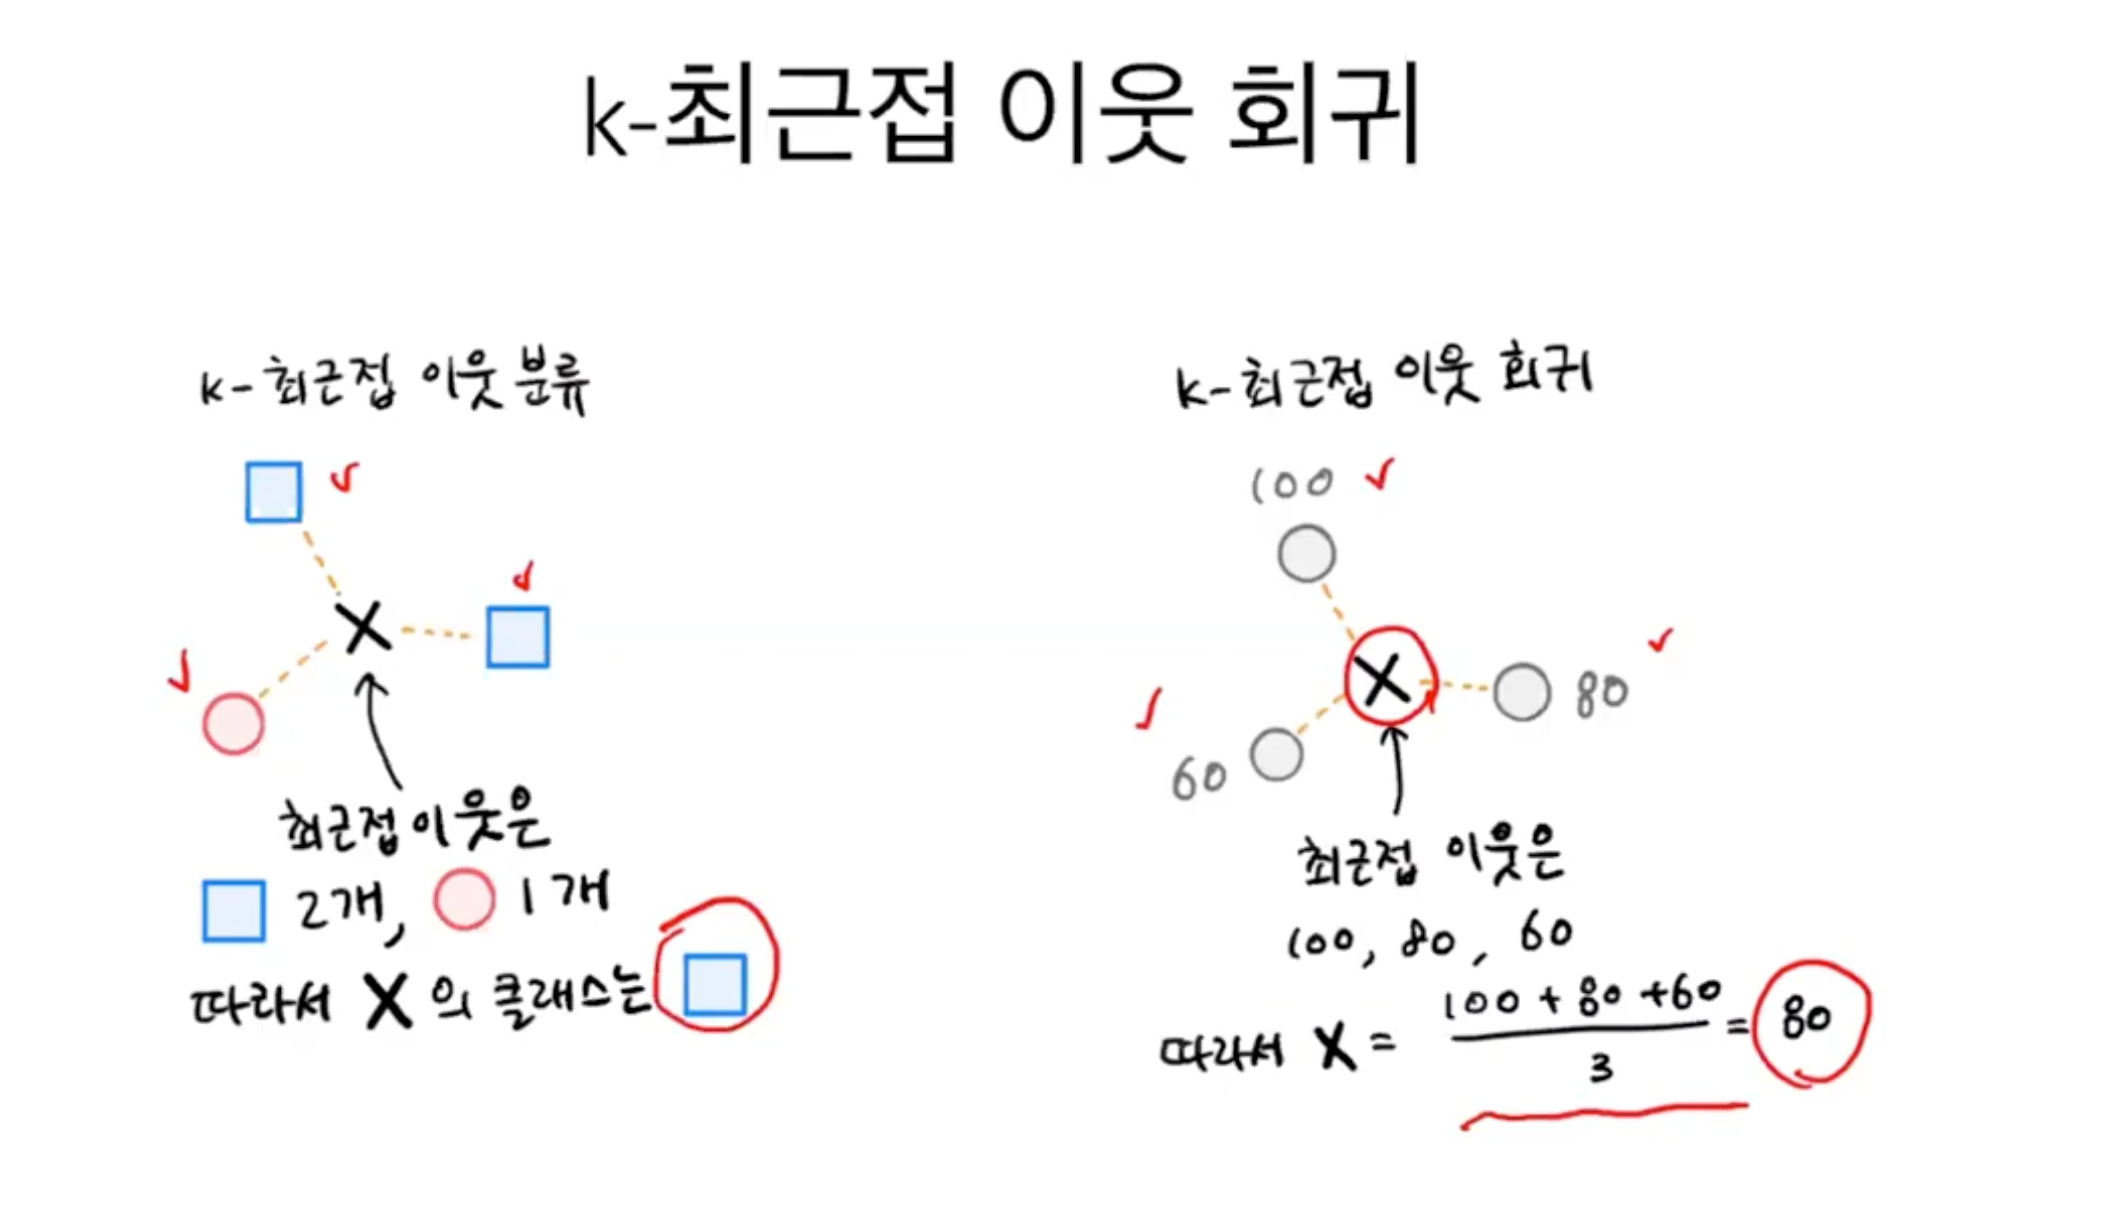



In [11]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

In [14]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

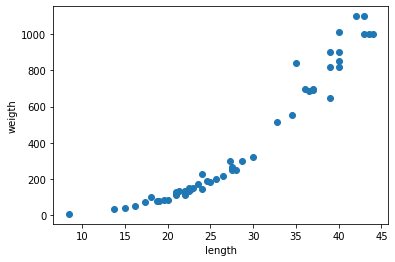

In [15]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weigth')
plt.show()

# 훈련 세트 준비 


In [16]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

train_input = train_input.reshape(-1, 1)  # 행차원 -1 : 나머지 파원이 결정 되고 남은 차원을 사용하겠다. 의미 / 1 열이 하나 
test_input = test_input.reshape(-1, 1)

## reshape 메소드 = 배열 크기 지정 가능  

In [17]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [18]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [19]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


# 결정계수 (R2)


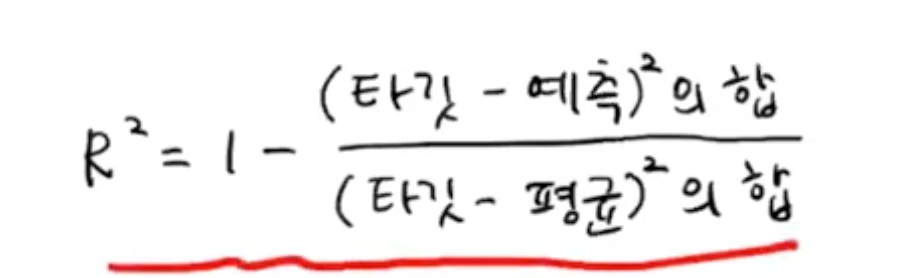

**결정계수** 

1 예측이 100%  

0 예측이 0% 이다 . 

0~1 사이로 측정된다. 

In [20]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [21]:
print(knr.score(test_input, test_target))

0.9928094061010639


In [22]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)
# 절대값 오차 

19.157142857142862


# 과대적합 vs 과소적합 

In [24]:
# 앞에서 훈련한 모델을 사용해 훈련 세트의 결정계수 점수를 확인 할 수 있다. 

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9698823289099255
0.9928094061010639


train 점수가 test 보다 높을 경우 = 과소 적합 

train 점수가 test 보다 낮을 경우 = 과대 적합



In [25]:
knr.n_neighbors = 3  # 기본값은 5 이다. 
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.974645996398761


# 선형 회귀 

선형 회귀전 근접값 예측을 해본다. 

In [37]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


In [40]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [42]:
# 50cm의 농어의 무게를 예측하기 

print(knr.predict([[50]]))

[1033.33333333]


**실제 농어는 무게가 더 많이 나간다. 
그럼 어떤 부분이 문제가 생길 걸까?**

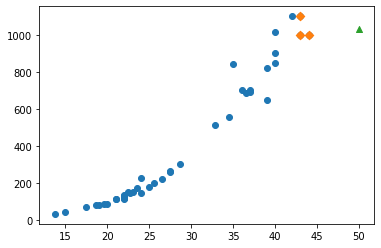

In [43]:
distances, indexes = knr.kneighbors([[50]]) # 50cm 농어의 이웃을 구한다.


plt.scatter(train_input, train_target)      # 훈련세트 산점도 그리기 
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D') # 훈련세트 중에서 이웃 샘플만 다시 그리기 

plt.scatter(50, 1033, marker = '^')          # 50cm 농어 데이터
plt.show()

**근접값 예측은 말그대로 근접값만 예측한다.**

농어는 길이가 길면 무게도 점차 들어난다.

그럼 50cm 는 무게는 40cm 언저리 농어보다 무게가 더 나가야 하는데 
근접값 예측으로 인해 

비슷한 무게로 예측한 것이다. 

증가하는 길이 만큼 무게도 증가하는 방식으로 예측해야 한다. 



In [46]:
print(np.mean(train_target[indexes]))

print(knr.predict([[100]]))

# 동일함을 볼 수 있다. 

1033.3333333333333
[1033.33333333]


## 선형 회귀로 예측하면 해결이 가능하다.  

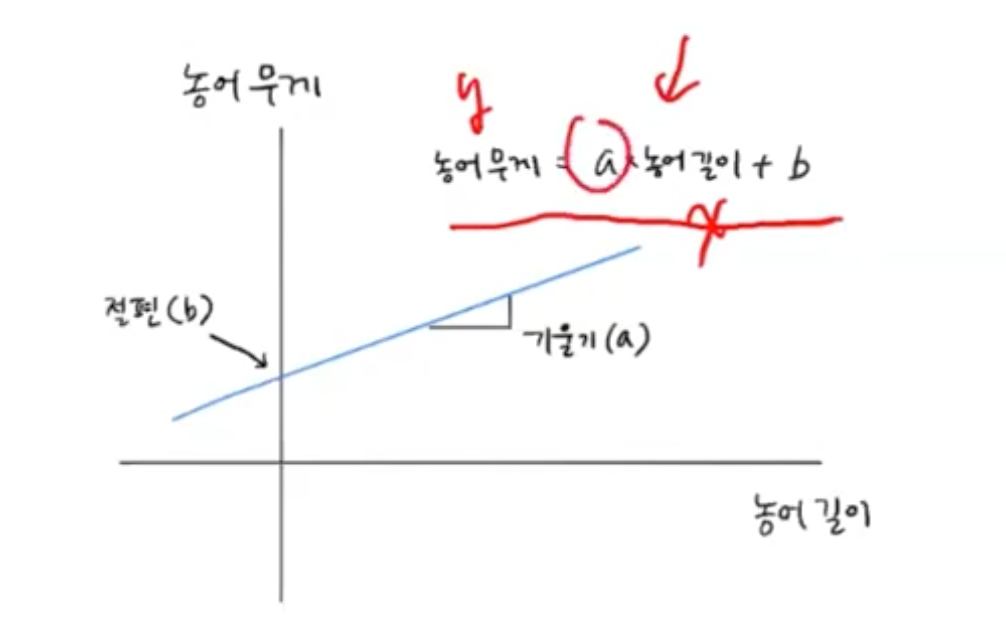

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [49]:
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측 

print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


## 훈련 세트의 산점도 

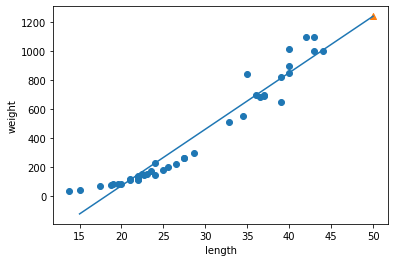

In [50]:
plt.scatter(train_input, train_target) 


# 15 ~ 50 까지의 1차 방정식 그래프를 그린다. 
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [51]:
print(lr.score(train_input, train_target)) 
print(lr.score(test_input, test_target))

0.9398463339976039
0.8247503123313558


train = 0.9398463339976039 <- train 점수도 맞은 편에 속한다. 

test = 0.8247503123313558  <- test 점수가 너무 낮다 

전체적 과소적합 이다. 

# 다항회귀 (maltiple regresion)

2차 함수로 하면 0이하로 떨어지는 일이 벌어 지지 않고 좀더 적합한 계산을 할 수 있다. 

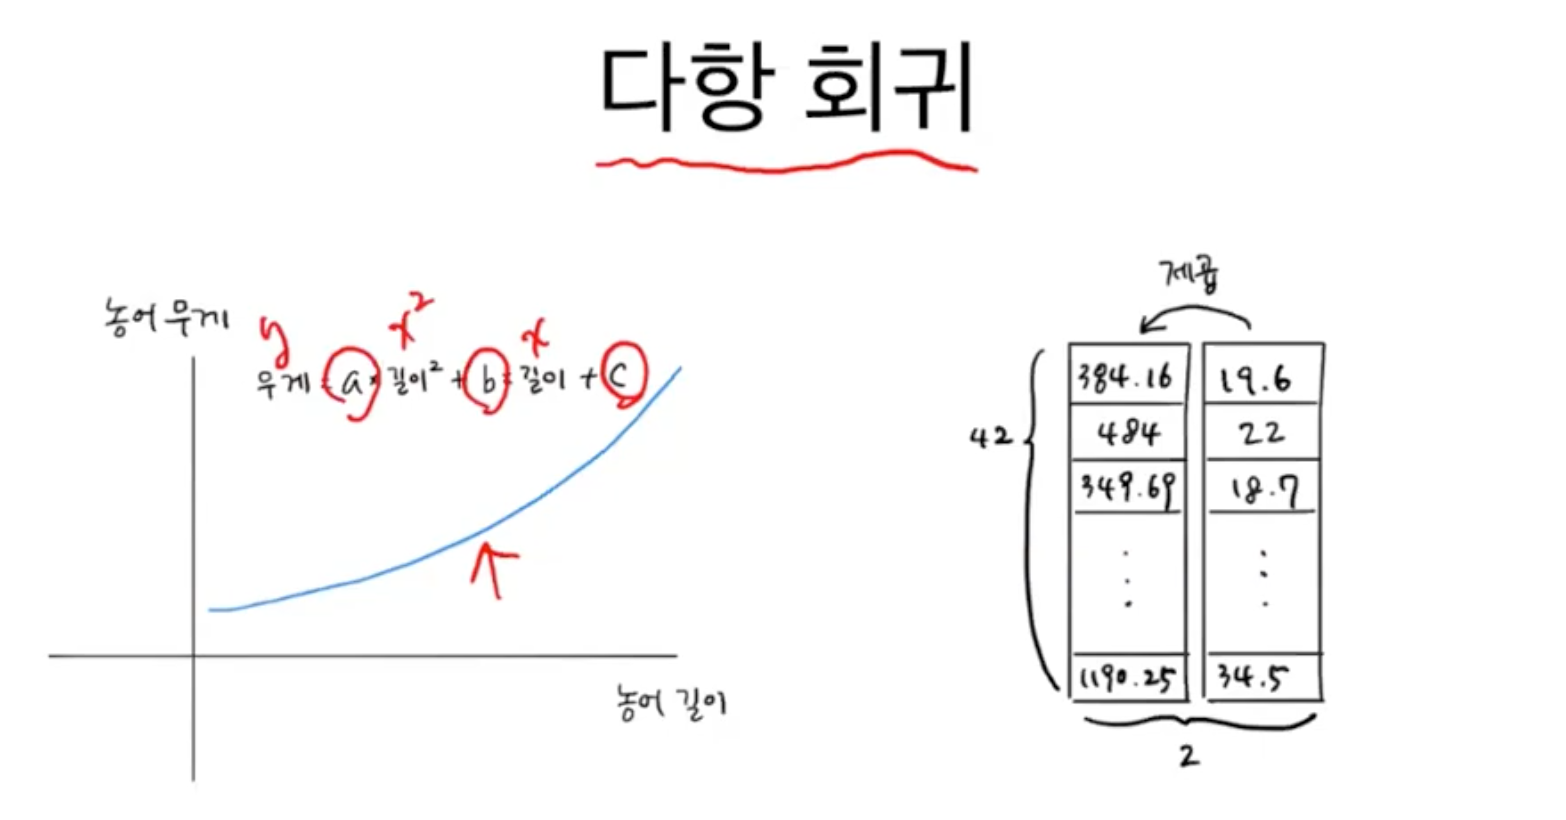

In [55]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [56]:
# 모델 다시 훈련 

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


무게 = 1.01 * 길이^2 - 21.6 * 길이 + 116.05 

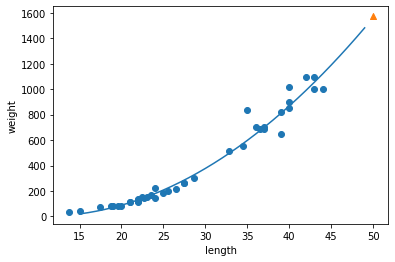

In [57]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01 *point**2 - 21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [58]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 특성 공학과 규제 

판다스로 데이터 준비 

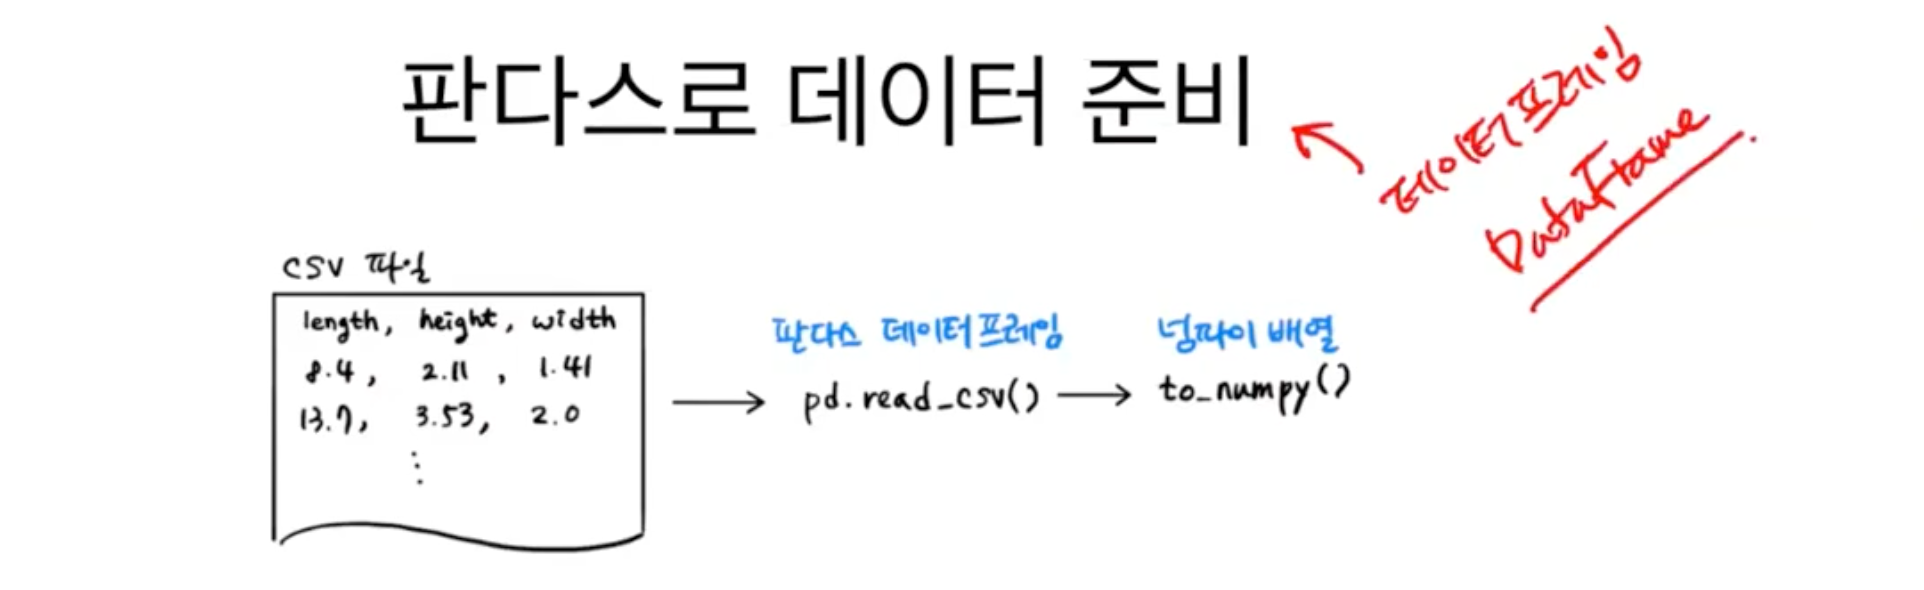

In [61]:
import pandas as pd


df = pd.read_csv('http://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [62]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [67]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [70]:
ploy = PolynomialFeatures()       # degree = 2 기본값 2 
ploy.fit([[2, 3]])

print(ploy.transform([[2, 3]]))  # 가상의 쌤플 데이터 불러오기 [2, 3] # 1(bias), 2, 3, 2**2, 2*3, 3**2 다항은 1을 무시함 

[[1. 2. 3. 4. 6. 9.]]


In [71]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [72]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [74]:
test_poly = poly.transform(test_input)

# 다중 회귀 모델 훈련하기 

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982124
0.9714559911594132


In [77]:
poly = PolynomialFeatures(degree = 5, include_bias= False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [79]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999991096
-144.40579242335605


**과대 적합이 된 결과라고 볼 수 있다.**

훈련세트가 42개 특성 55개 이기 때문에 과대 적합이 된다.

극도 과대 적합에서도 줄일 수 있다. 그 방법이 **규제=(정규화)** 

# 규제 


가중치 (기울기)를 작게 만드는것 

릿지와 랏소 

In [81]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# 훈련
ss.fit(train_poly)

# 표준점수로 한 준비 
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지 회귀 

In [83]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


train = 0.9896101671037343

test = 0.9790693977615398

**둘다 점수가 높아진것을 볼 수 있다.**

(가중치)^2 L2 규제 

In [88]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [89]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

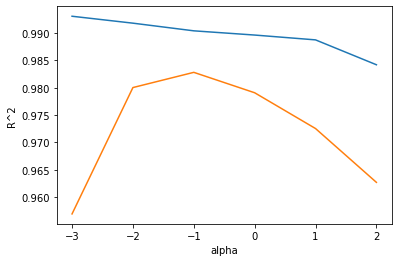

In [91]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()  # 파랑색 = 훈련세트 그래프 / 주황색 = 테스트세트 그래프

In [92]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386927


# 라쏘 회귀


In [93]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.9897898972080961


In [94]:
print(lasso.score(test_scaled, test_target)) 

0.9800593698421883


In [95]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792876, tolerance: 518.2793833333334
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345404844, tolerance: 518.2793833333334
  positive)


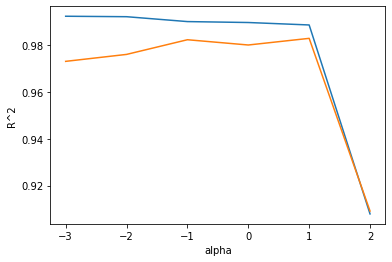

In [96]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()       # 파랑색 = 훈련세트 그래프 / 주황색 = 테스트세트 그래프 

**alpha 값은 1, 즉 10^1 = 10**

In [97]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [98]:
print(np.sum(lasso.coef_ == 0))

40
